In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# import sys
# sys.path.insert(0, '../')

import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from gantools import plot, utils, data
from gantools.model import WGAN
from gantools.gansystem import GANsystem
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [4]:
fwd = data.fmap.medical_forward
bkd = data.fmap.medical_backward

def non_lin(x):
    return (tf.nn.tanh(x) + 1.0)/2.0
ns = 32
num_sampled = 36

pathmodel = '../saved_result/medical/WGAN_0_to_32_4_checkpoints/'

## 0->32

In [5]:
dataset_32 = data.load.load_medical_dataset(spix=32,scaling=8, augmentation=False, shuffle=False, patch=False)
# dataset_32 = data.load.load_medical_dataset(spix=16,scaling=16, augmentation=False, shuffle=False, patch=False)
real_32_raw = dataset_32.get_all_data()
print("Dataset_32 shape: ", np.shape(real_32_raw))

Dataset_32 shape:  (105, 32, 32, 32)


In [6]:
checkpoint = None

# params_32 = utils.load_params(pathmodel)
# params_32['net']['cosmology']['backward_map'] = bkd
# params_32['net']['cosmology']['forward_map'] = fwd

wgan_32 = utils.load_gan(pathmodel,WGAN)

Generator 
--------------------------------------------------
     The input is of size (?, 200)
     0 Full layer with 512 outputs
         Size of the variables: (?, 512)
     Reshape to (?, 4, 4, 4, 8)
     0 Inception deconv(1x1,3x3,5x5) layer with 8 channels
         Non linearity applied
         Size of the variables: (?, 4, 4, 4, 24)
     1 Inception deconv(1x1,3x3,5x5) layer with 2048 channels
         Non linearity applied
         Size of the variables: (?, 8, 8, 8, 6144)
     2 Inception deconv(1x1,3x3,5x5) layer with 256 channels
         Non linearity applied
         Size of the variables: (?, 16, 16, 16, 768)
     3 Inception deconv(1x1,3x3,5x5) layer with 32 channels
         Non linearity applied
         Size of the variables: (?, 32, 32, 32, 96)
     4 Inception deconv(1x1,3x3,5x5) layer with 32 channels
         Non linearity applied
         Size of the variables: (?, 32, 32, 32, 96)
     5 Inception deconv(1x1,3x3,5x5) layer with 32 channels
         Non linearit

In [7]:
gen_samples_32 = np.squeeze(wgan_32.generate(N=num_sampled, checkpoint=checkpoint))
gen_samples_32_raw = bkd(gen_samples_32)

Sampling z
 [*] Reading checkpoints...
INFO:tensorflow:Restoring parameters from ../saved_result/medical/WGAN_0_to_32_4_checkpoints/wgan-1110
Checkpoint succesfully loaded!


 97%|█████████▋| 32/33 [00:02<00:00, 11.93it/s]


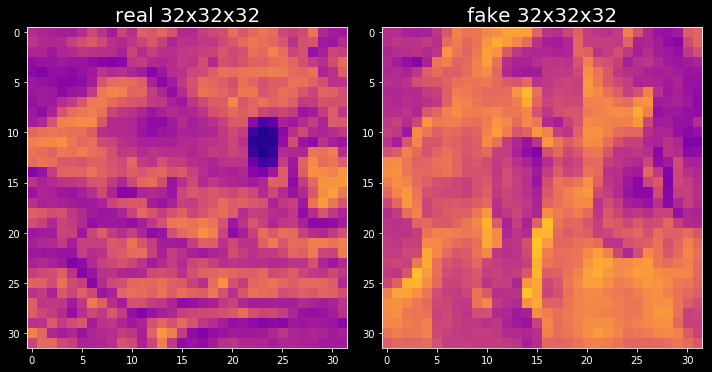

In [8]:
fake_cube_32 = fwd(gen_samples_32_raw[2, :, :, :])
real_cube_32 = fwd(real_32_raw[2, :, :, :])
animation = plot.get_animation(real_cube_32, fake_cube_32, figsize=(10, 6), fps=8)
animation.ipython_display(fps=8, loop=True, autoplay=True)

# Check mode collapse

Text(0.5,1,'Real 32x32x32')

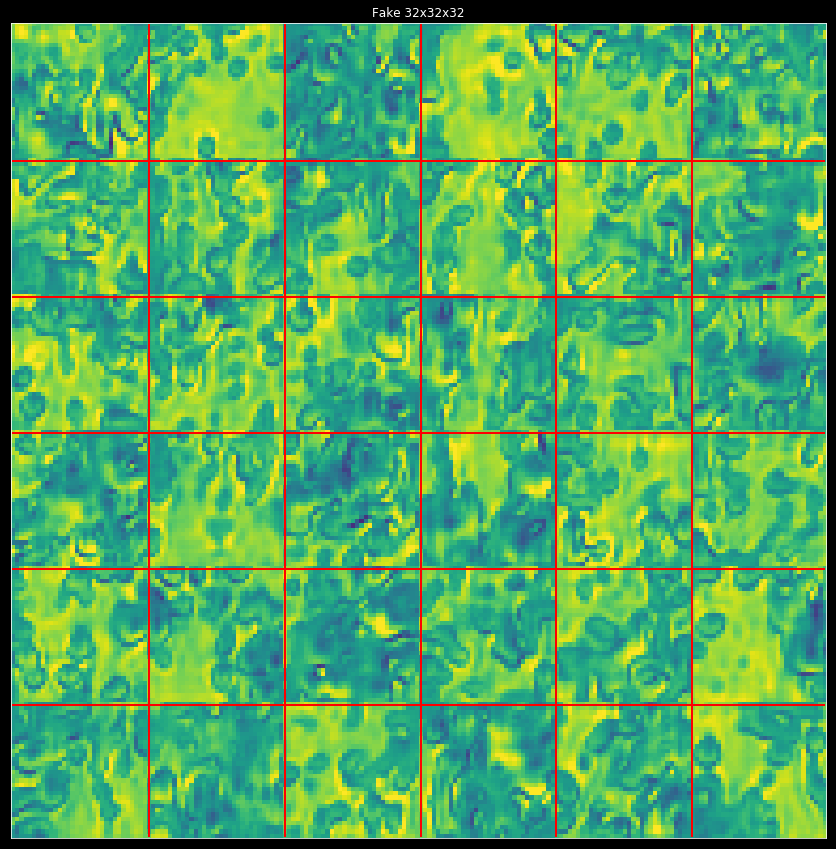

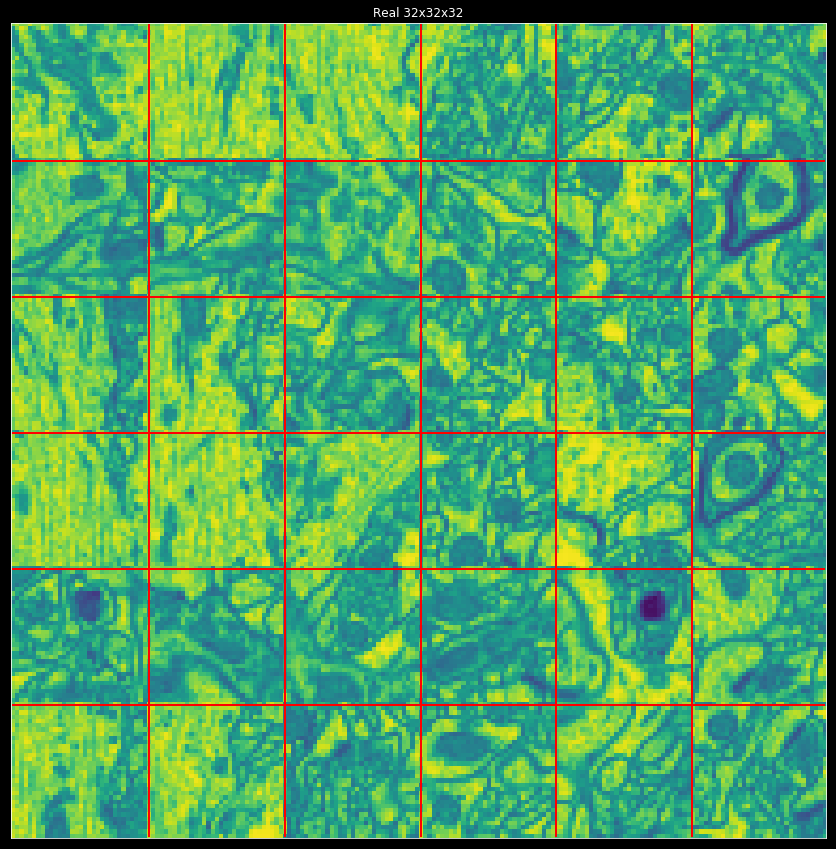

In [9]:
sl = 8
vmin = np.min(real_32_raw)
vmax = np.max(real_32_raw)
slices_fake = gen_samples_32_raw[:,sl,:,:]
slices_real = real_32_raw[16:,sl,:,:]
plt.figure(figsize=(15,15))
ax = plot.draw_images(slices_fake,6,6, vmin=vmin, vmax=vmax)
plt.title('Fake 32x32x32')

plt.figure(figsize=(15,15))
plot.draw_images(slices_real,6,6, vmin=vmin, vmax=vmax)
plt.title('Real 32x32x32')
